## 차이 검정 실습
- 귀무가설 : 3월 아파트 가격의 평균과 4월 가격의 평균은 같다.
- 대립가설 : 3월 아파트 가격의 평균과 4월 가격의 평균은 같지 않다.
- p-value >= 0.05 : 귀무가설 채택
- p-value < 0.05 : 귀무가설 기각 (= 대립가설 채택)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 2.3 MB/s eta 0:00:00


In [9]:
from pingouin import ttest
import pandas as pd
base_path = '/content/drive/MyDrive/git/프로젝트/ch07/data'
seoul = pd.read_csv(base_path + "/seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([3,4]))]

In [10]:
apt_df.shape

(6174, 22)

In [11]:
apt_df['OBJ_AMT'].head()

,OBJ_AMT
1507,72500
1508,13500
1510,143000
1512,79800
1513,142000


In [12]:
len(apt_df)

6174

In [13]:
apt_df.groupby('month')['OBJ_AMT'].agg(["mean", "std", "size"])

,mean,std,size
month,,,
3,97682.076098,73307.623625,3075
4,102817.208132,70163.373378,3099


In [14]:
march_df = apt_df[apt_df['month'] == 3]
april_df = apt_df[apt_df['month'] == 4]
ttest(march_df['OBJ_AMT'], april_df['OBJ_AMT'], paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.811424,6155.624136,two-sided,0.004948,"[-8715.76, -1554.51]",0.071573,1.475,0.802755


In [15]:
ttest(march_df['OBJ_AMT'], april_df['OBJ_AMT'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.811424,6155.624136,two-sided,0.004948,"[-8715.76, -1554.51]",0.071573,1.475,0.802755


### 결과표 해석
- 반환값 : https://pingouin-stats.org/build/html/generated/pingouin.ttest.html
    - T-value : T-value
    - dof : degrees of freedom (자유도)
    - p-value : p-value
    - cohen-d : Cohen’s d effect size
    - BF10 : Bayes Factor of the alternative hypothesis
    - Power : achieved power of the test (= 1 - type II error)

    
EDA 기초통계 및 차이검정 (실습)
[라이브러리]

pingouin.ttest : https://pingouin-stats.org/build/html/generated/pingouin.ttest.html
[참조]

cohend's D : https://resources.nu.edu/statsresources/cohensd
BF10 : https://m.blog.naver.com/sw4r/221409143181
Power of the test ( = 1 - type II error): https://en.wikipedia.org/wiki/Power_of_a_test

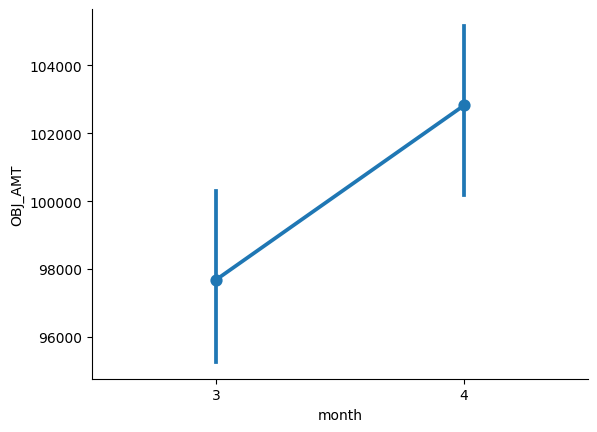

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.pointplot(x = 'month', y = 'OBJ_AMT', data = apt_df)
sns.despine()
plt.show()

# 신뢰 구간이 겹쳐있는지 확인 : 어떤 샘플에서는 차이가 안나고 비슷하게 나올 수 있다는 뜻.

## 상관분석

In [17]:
from pingouin import ttest
import pandas as pd

base_path = '/content/drive/MyDrive/git/프로젝트/ch07/data'
seoul = pd.read_csv(base_path + "/seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([3, 4]))]
apt_df.head()

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM,month
1507,2023,11290,성북구,13600,하월곡동,1.0,대지,226.0,0.0,월곡래미안루나밸리,...,59.98,0.0,21.0,NaN,NaN,2007.0,아파트,중개거래,서울 성북구,4
1508,2023,11350,노원구,10300,공릉동,1.0,대지,670.0,6.0,미라쉘,...,16.69,0.0,9.0,NaN,NaN,2018.0,아파트,중개거래,"서울 노원구, 서울 중랑구",4
1510,2023,11440,마포구,10100,아현동,1.0,대지,777.0,0.0,마포래미안푸르지오3단지,...,84.60,0.0,5.0,NaN,NaN,2014.0,아파트,중개거래,서울 마포구,4
1512,2023,11290,성북구,13800,장위동,1.0,대지,173.0,114.0,래미안장위퍼스트하이,...,59.99,0.0,9.0,NaN,NaN,2020.0,아파트,중개거래,서울 성북구,4
1513,2023,11215,광진구,10500,자양동,1.0,대지,507.0,6.0,이튼타워리버2차,...,84.61,0.0,20.0,NaN,NaN,2006.0,아파트,중개거래,서울 광진구,4


In [18]:
corr_df = apt_df.loc[:, ['DEAL_YMD', 'OBJ_AMT', 'BLDG_AREA', 'SGG_NM', 'month']].reset_index(drop=True)
corr_df

,DEAL_YMD,OBJ_AMT,BLDG_AREA,SGG_NM,month
0,2023-04-30,72500,59.98,성북구,4
1,2023-04-30,13500,16.69,노원구,4
2,2023-04-30,143000,84.60,마포구,4
3,2023-04-30,79800,59.99,성북구,4
4,2023-04-30,142000,84.61,광진구,4
...,...,...,...,...,...
6169,2023-03-01,88000,84.90,은평구,3
6170,2023-03-01,110000,84.90,노원구,3
6171,2023-03-01,125000,59.93,서초구,3
6172,2023-03-01,64000,42.63,동작구,3


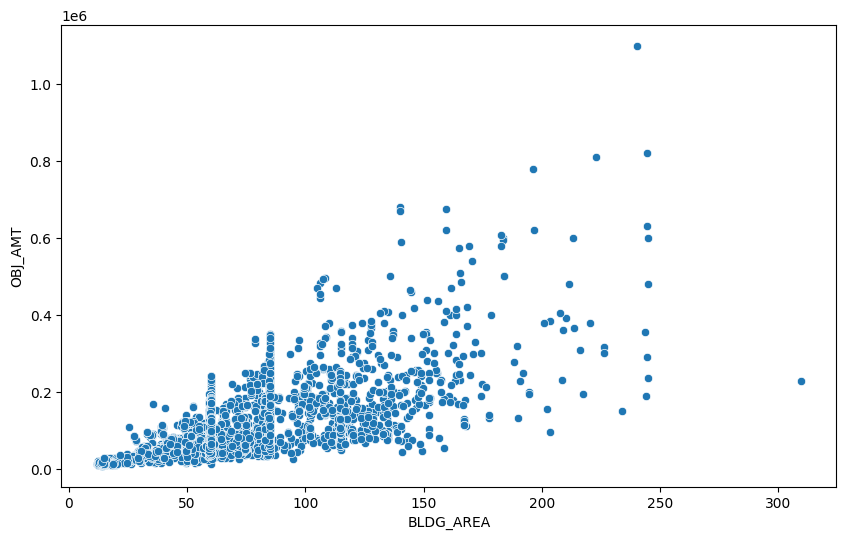

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = 'BLDG_AREA', y = 'OBJ_AMT', data = corr_df)
plt.show()

In [22]:
import pingouin as pg
pg.corr(corr_df['BLDG_AREA'], corr_df['OBJ_AMT']).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,6174,0.651,"[0.64, 0.66]",0.0,inf,1.0


- n : 샘플 개수
- r : 상관 계수
- CI95% : 95% 신뢰구

In [23]:
corr_coef = pg.corr(corr_df['BLDG_AREA'], corr_df['OBJ_AMT']).round(3)['r'].values[0]
corr_coef

0.651

In [24]:
corr_df[['BLDG_AREA','OBJ_AMT']].corr()

,BLDG_AREA,OBJ_AMT
BLDG_AREA,1.000000,0.650603
OBJ_AMT,0.650603,1.000000


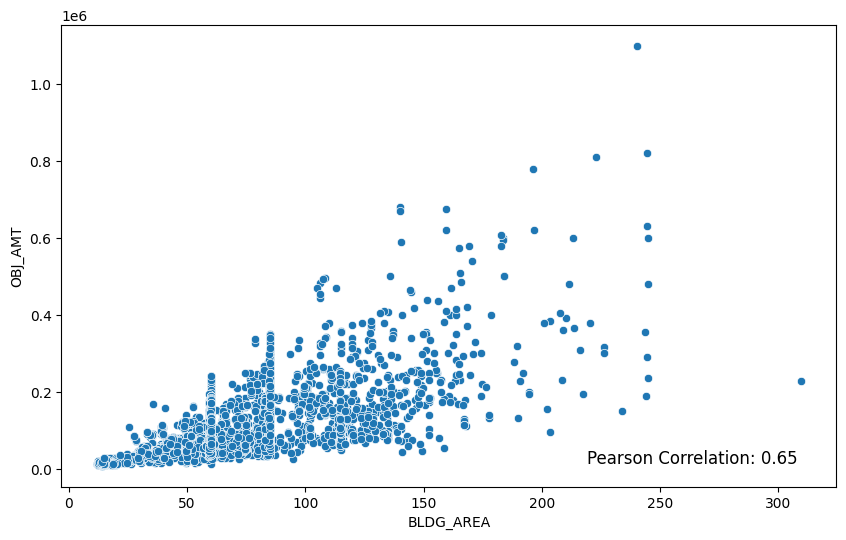

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = 'BLDG_AREA', y = 'OBJ_AMT', data = corr_df, ax=ax)
ax.text(0.95, 0.05, f'Pearson Correlation: {corr_coef:.2f}', transform=ax.transAxes, ha='right', fontsize=12)
plt.show()

## 자치구별 상관관계 계수 확인

<ipython-input-29-5cf61a75ca63>:18: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
<ipython-input-29-5cf61a75ca63>:18: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
<ipython-input-29-5cf61a75ca63>:18: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  plt.tight_layout()
<ipython-input-29-5cf61a75ca63>:18: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  plt.tight_layout()
<ipython-input-29-5cf61a75ca63>:18: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
<ipython-input-29-5cf61a75ca63>:18: UserWarning: Glyph 49832 (\N{HANGUL SYLLABLE SEUN}) missing from current font.
  plt.tight_layout()
<ipython-input-29-5cf61a75ca63>:18: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
<ipython-input-29-5cf61a75ca63>:18: UserWarning: Glyph 

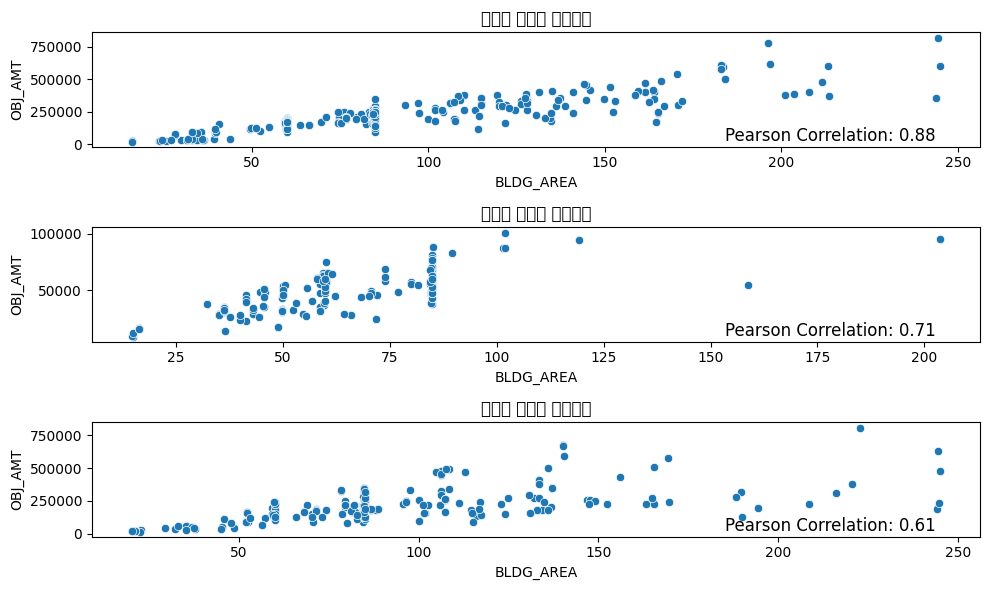

In [29]:
from matplotlib import font_manager, rc

# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

sgg_nm = ['강남구', '도봉구', '서초구']

fig, ax = plt.subplots(figsize=(10, 6), nrows = len(sgg_nm))
for i in range(len(sgg_nm)):
    sgg_df = corr_df[corr_df['SGG_NM'] == sgg_nm[i]]
    corr_coef = pg.corr(sgg_df['BLDG_AREA'], sgg_df['OBJ_AMT']).round(3)['r'].values[0]

    # 시각화
    sns.scatterplot(x = 'BLDG_AREA', y = 'OBJ_AMT', data = sgg_df, ax=ax[i])
    ax[i].text(0.95, 0.05, f'Pearson Correlation: {corr_coef:.2f}', transform=ax[i].transAxes, ha='right', fontsize=12)
    ax[i].set_title(f'{sgg_nm[i]} 피어슨 상관계수')
plt.tight_layout()
plt.show()

## 회귀분석

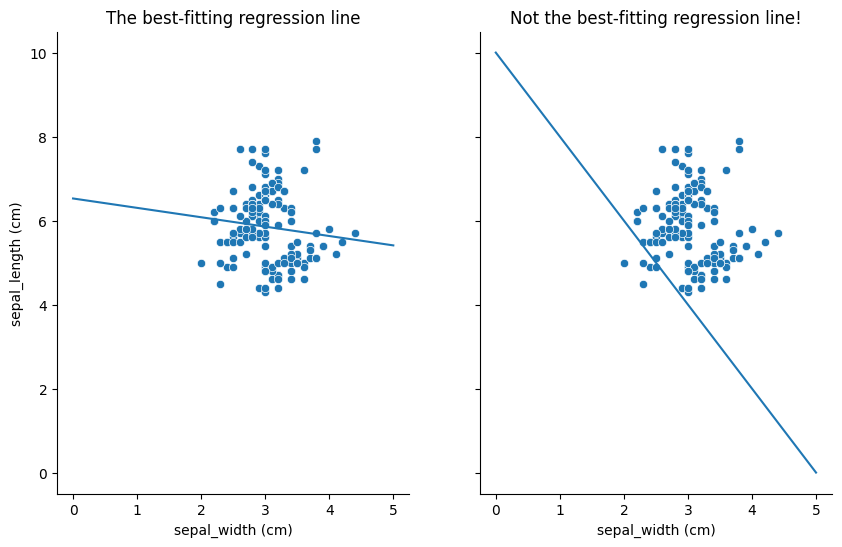

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

iris = sns.load_dataset('iris')
model = smf.ols(formula="sepal_length ~ sepal_width", data=iris).fit() # ols : 최소자승법, 최소제곱법
intercept = model.params.Intercept # 절편
slope = model.params.sepal_width # 기울기

fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
x = np.linspace(0,5)
sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length', ax = ax[0])
fig.axes[0].set_title("The best-fitting regression line")
fig.axes[0].set_xlabel("sepal_width (cm)")
fig.axes[0].set_ylabel("sepal_length (cm)")
fig.axes[0].plot(x,slope*x+intercept)

sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length', ax = ax[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("sepal_width (cm)")
fig.axes[1].set_ylabel("sepal_length (cm)")
fig.axes[1].plot(x,-2*x+10)
sns.despine()
plt.show()

In [32]:
import pingouin as pg
mod1 = pg.linear_regression(iris['sepal_width'], iris['sepal_length'])
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.53,0.48,13.63,0.00,0.01,0.01,5.58,7.47
1,sepal_width,-0.22,0.16,-1.44,0.15,0.01,0.01,-0.53,0.08


In [33]:
# 예측 변수 추가
predictors = ['sepal_width', 'petal_length']
outcome = 'sepal_length'
mod2 = pg.linear_regression(iris[predictors], iris[outcome])
mod2.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.25,0.25,9.07,0.0,0.84,0.84,1.76,2.74
1,sepal_width,0.60,0.07,8.59,0.0,0.84,0.84,0.46,0.73
2,petal_length,0.47,0.02,27.57,0.0,0.84,0.84,0.44,0.51


In [34]:
iris[['sepal_length', 'sepal_width', 'petal_length']].rcorr()

,sepal_length,sepal_width,petal_length
sepal_length,-,,***
sepal_width,-0.118,-,***
petal_length,0.872,-0.428,-


In [35]:
import pingouin as pg
mod1 = pg.linear_regression(iris['sepal_width'], iris['sepal_length'])
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.53,0.48,13.63,0.00,0.01,0.01,5.58,7.47
1,sepal_width,-0.22,0.16,-1.44,0.15,0.01,0.01,-0.53,0.08


In [36]:
mod3 = pg.linear_regression(iris['petal_length'], iris['sepal_length'])
mod3.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.31,0.08,54.94,0.0,0.76,0.76,4.15,4.46
1,petal_length,0.41,0.02,21.65,0.0,0.76,0.76,0.37,0.45
